# Higgs Boson Detection 2024
*Searching for exotic particles in high-energy physics with machine learning*

## Overview
The goal of this competition is to classify events into two classes: events that produce the exotic Higgs Boson particle, and those that do not. Each event is a simulated particle collision represented by 28 features that describe the trajectories of decay particles. These are realistic simulations of particle collisions occuring in the ATLAS detector at the Large Hadron Collider at CERN, near Geneva, Switzerland.

An analysis like this was used to discover the Higgs Boson in 2012; a machine learning classifier was trained on simulation and calibration data, then used to analyze real data from the experiment. Improved machine learning methods for this type of data could enable physicists to make new discoveries faster. It is thought that there are additional particles yet to be discovered, so more sensitive machine learning methods could help scientists discover new physics.

## Dataset

This data set is a sample from the HIGGS data set published with [Baldi, Sadowski, and Whiteson, Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://www.nature.com/articles/ncomms5308) and available [here](https://archive.ics.uci.edu/ml/datasets/HIGGS).

In [1]:
%%bash
mkdir -p data

In [2]:
!wget "https://archive.ics.uci.edu/static/public/280/higgs.zip" -P data -q --show-progress

higgs.zip               [ <=>                ]   2.62G  55.8MB/s    in 55s     


In [3]:
!unzip data/higgs.zip

Archive:  data/higgs.zip
  inflating: HIGGS.csv.gz            


In [4]:
!gzip -d HIGGS.csv.gz

In [5]:
!ls

data  HIGGS.csv  sample_data


In [6]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
column_names = ['lable', 'lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
                'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [8]:
df = pd.read_csv('HIGGS.csv', header=None, nrows=200000)
df.columns=column_names

In [9]:
df.head()

,lable,lep_pt,lep_eta,lep_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [10]:
features_low = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']

features_high = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

features = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
            'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
            'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [11]:
Y = df['lable'].values
X = df[[col for col in features]]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

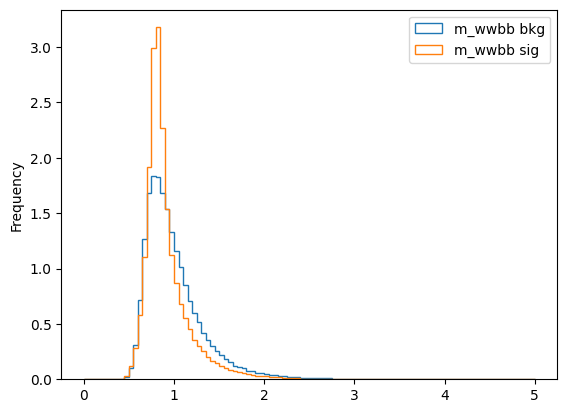

In [12]:
import matplotlib.pyplot as plt

#plot a few features
var_name = 'm_wwbb'
ax = df[df['lable']==0].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density=True)
#ax.set_yscale('log')
df[df['lable']==1].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density = True, ax=ax)
ax.legend(labels=[var_name+' bkg', var_name+' sig'])

In [13]:
# Enjoy!

In [14]:
Y = df['lable'].values
X = df[[col for col in features_high]]

In [22]:
# baseline keras model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Input,
    Activation,
    Dense,
    Convolution2D,
    MaxPooling2D,
    Dropout,
    Flatten,
)

VARS = features_high
NDIM = len(VARS)
inputs = Input(shape=(NDIM,), name="input")

x = Dense(128, activation="relu")(inputs)
x = Dropout(0.3)(x)

x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)

x = Dense(32, activation="relu")(x)
x = Dropout(0.1)(x)

x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)

outputs = Dense(1, name="output", kernel_initializer="normal", activation="sigmoid")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# preprocessing: standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

In [24]:
# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=15)

In [25]:
# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    "dense_model.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

In [ ]:
# Train classifier
history = model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=1024,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint],
    validation_split=0.25,
)

Epoch 1/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5789 - loss: 0.6809

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5817 - loss: 0.6793 - val_accuracy: 0.6696 - val_loss: 0.6124
Epoch 2/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6630 - loss: 0.6179

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6631 - loss: 0.6177 - val_accuracy: 0.6839 - val_loss: 0.5907
Epoch 3/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6718 - loss: 0.6009

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6719 - loss: 0.6008 - val_accuracy: 0.6879 - val_loss: 0.5813
Epoch 4/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6821 - loss: 0.5895

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6821 - loss: 0.5895 - val_accuracy: 0.6879 - val_loss: 0.5760
Epoch 5/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6814 - loss: 0.5871

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6814 - loss: 0.5871 - val_accuracy: 0.6943 - val_loss: 0.5717
Epoch 6/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6878 - loss: 0.5792

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6877 - loss: 0.5793 - val_accuracy: 0.6950 - val_loss: 0.5692
Epoch 7/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6845 - loss: 0.5809

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6846 - loss: 0.5809 - val_accuracy: 0.6979 - val_loss: 0.5659
Epoch 8/1000
 94/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6882 - loss: 0.5795

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6885 - loss: 0.5791 - val_accuracy: 0.6985 - val_loss: 0.5647
Epoch 9/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6896 - loss: 0.5758

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6897 - loss: 0.5758 - val_accuracy: 0.7019 - val_loss: 0.5643
Epoch 10/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6920 - loss: 0.5739

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6920 - loss: 0.5739 - val_accuracy: 0.7000 - val_loss: 0.5640
Epoch 11/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6908 - loss: 0.5736

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6909 - loss: 0.5735 - val_accuracy: 0.7023 - val_loss: 0.5615
Epoch 12/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6934 - loss: 0.5715

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6934 - loss: 0.5716 - val_accuracy: 0.7018 - val_loss: 0.5615
Epoch 13/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6935 - loss: 0.5700

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6935 - loss: 0.5701 - val_accuracy: 0.7037 - val_loss: 0.5613
Epoch 14/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6927 - loss: 0.5707

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6927 - loss: 0.5707 - val_accuracy: 0.7031 - val_loss: 0.5597
Epoch 15/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6923 - loss: 0.5728 - val_accuracy: 0.7037 - val_loss: 0.5598
Epoch 16/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6929 - loss: 0.5700

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6930 - loss: 0.5699 - val_accuracy: 0.7033 - val_loss: 0.5596
Epoch 17/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6962 - loss: 0.5658 - val_accuracy: 0.7033 - val_loss: 0.5599
Epoch 18/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6975 - loss: 0.5653

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6974 - loss: 0.5654 - val_accuracy: 0.7061 - val_loss: 0.5583
Epoch 19/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6965 - loss: 0.5667 - val_accuracy: 0.7048 - val_loss: 0.5586
Epoch 20/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6989 - loss: 0.5661

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6988 - loss: 0.5662 - val_accuracy: 0.7050 - val_loss: 0.5578
Epoch 21/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6967 - loss: 0.5665 - val_accuracy: 0.7059 - val_loss: 0.5579
Epoch 22/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6986 - loss: 0.5675

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6986 - loss: 0.5674 - val_accuracy: 0.7051 - val_loss: 0.5577
Epoch 23/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6998 - loss: 0.5650

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6997 - loss: 0.5650 - val_accuracy: 0.7041 - val_loss: 0.5572
Epoch 24/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6953 - loss: 0.5699

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6955 - loss: 0.5696 - val_accuracy: 0.7061 - val_loss: 0.5570
Epoch 25/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6975 - loss: 0.5650

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6976 - loss: 0.5651 - val_accuracy: 0.7072 - val_loss: 0.5559
Epoch 26/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6968 - loss: 0.5653 - val_accuracy: 0.7068 - val_loss: 0.5560
Epoch 27/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6978 - loss: 0.5667 - val_accuracy: 0.7075 - val_loss: 0.5563
Epoch 28/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7002 - loss: 0.5630 - val_accuracy: 0.7068 - val_loss: 0.5566
Epoch 29/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7002 - loss: 0.5640 - val_accuracy: 0.7075 - val_loss: 0.5562
Epoch 30/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7021 - loss: 0.5640 - val_accuracy: 0.7087 - val_loss: 0.5561
Epoch 31/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6995 - loss: 0.5644

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6996 - loss: 0.5644 - val_accuracy: 0.7093 - val_loss: 0.5546
Epoch 32/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7018 - loss: 0.5633

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7017 - loss: 0.5634 - val_accuracy: 0.7090 - val_loss: 0.5544
Epoch 33/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7002 - loss: 0.5640 - val_accuracy: 0.7083 - val_loss: 0.5548
Epoch 34/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6994 - loss: 0.5649 - val_accuracy: 0.7080 - val_loss: 0.5546
Epoch 35/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7011 - loss: 0.5653

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7011 - loss: 0.5652 - val_accuracy: 0.7100 - val_loss: 0.5537
Epoch 36/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7031 - loss: 0.5610 - val_accuracy: 0.7084 - val_loss: 0.5555
Epoch 37/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7019 - loss: 0.5617 - val_accuracy: 0.7092 - val_loss: 0.5539
Epoch 38/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7004 - loss: 0.5637 - val_accuracy: 0.7089 - val_loss: 0.5547
Epoch 39/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7015 - loss: 0.5611 - val_accuracy: 0.7085 - val_loss: 0.5543
Epoch 40/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7021 - loss: 0.5626

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7021 - loss: 0.5625 - val_accuracy: 0.7103 - val_loss: 0.5534
Epoch 41/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7025 - loss: 0.5615

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7025 - loss: 0.5616 - val_accuracy: 0.7105 - val_loss: 0.5530
Epoch 42/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7006 - loss: 0.5612 - val_accuracy: 0.7080 - val_loss: 0.5544
Epoch 43/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7059 - loss: 0.5609 - val_accuracy: 0.7094 - val_loss: 0.5542
Epoch 44/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7033 - loss: 0.5615 - val_accuracy: 0.7094 - val_loss: 0.5534
Epoch 45/1000
 82/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7044 - loss: 0.5579

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history["loss"], label="loss")
ax.plot(history.history["val_loss"], label="val_loss")
ax.legend(loc="upper right")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history["accuracy"], label="acc")
ax.plot(history.history["val_accuracy"], label="val_acc")
ax.legend(loc="upper left")
ax.set_xlabel("epoch")
ax.set_ylabel("acc")

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("receiver operating curve")
ax.legend(loc="lower right")
plt.show()

In [ ]:
df["dense"] = model.predict(X)  # add prediction to array
print(df.loc[:30, ["lable", "dense"]])